Feature names (words): ['amazing' 'awful' 'bad' 'best' 'broke' 'buying' 'company' 'complete'
 'customer' 'disappointing' 'disgusting' 'enjoy' 'excellent' 'experience'
 'fantastic' 'great' 'happy' 'hate' 'highly' 'horrible' 'impressive' 'lot'
 'love' 'money' 'perfect' 'poor' 'product' 'purchase' 'quality' 'quickly'
 'really' 'recommend' 'regret' 'satisfied' 'service' 'superb' 'support'
 'terrible' 'time' 'unacceptable' 'waste' 'wonderful' 'worst' 'worth']
Labels in test set (y_test): [0 0 0 0 1 1 0 0 1]

Training Accuracy with C=1.0: 1.00
Training Classification Report:
                 precision    recall  f1-score   support

 Negative (Chê)       1.00      1.00      1.00         9
Positive (Khen)       1.00      1.00      1.00        12

       accuracy                           1.00        21
      macro avg       1.00      1.00      1.00        21
   weighted avg       1.00      1.00      1.00        21


Accuracy with C=1.0: 0.44
Classification Report:
                 precision   

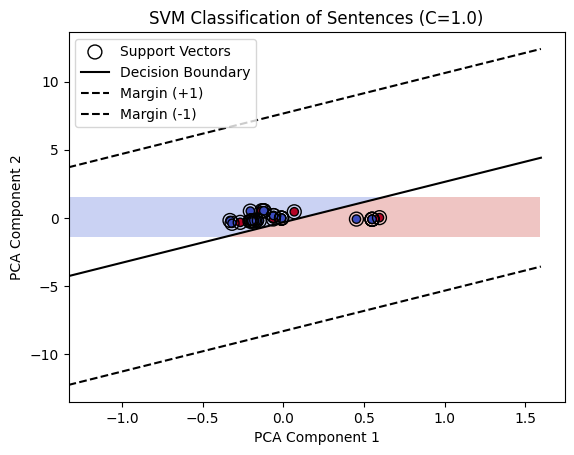

In [9]:
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# 1. Tạo dữ liệu mẫu: Câu khen (positive) và câu chê (negative)
sentences = [
    # Câu khen (positive)
    "This product is amazing",
    "I love this service",
    "Great experience with this company",
    "The quality is fantastic",
    "Very happy with my purchase",
    "Excellent customer support",
    "I highly recommend this",
    "Best product ever",
    "Really satisfied with this",
    "Wonderful experience",
    "This is a great product",
    "I enjoy this service a lot",
    "Superb quality and support",
    "Highly impressive service",
    "Perfect purchase experience",
    # Câu chê (negative)
    "This is terrible",
    "I hate this product",
    "Very disappointing experience",
    "Poor quality and bad service",
    "Not worth the money",
    "Awful customer service",
    "Complete waste of time",
    "This product broke quickly",
    "I regret buying this",
    "Horrible experience",
    "Terrible quality and support",
    "Disgusting service",
    "Worst purchase ever",
    "Bad experience with this",
    "Unacceptable product"
]

# Nhãn: 1 = positive (khen), 0 = negative (chê)
labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 2. Chuyển đổi văn bản thành vector số bằng TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Xóa max_features để giữ tất cả từ
X = vectorizer.fit_transform(sentences).toarray()
y = np.array(labels)

# In thử các từ đặc trưng (feature names) để kiểm tra
print("Feature names (words):", vectorizer.get_feature_names_out())

# 3. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# In tập kiểm tra để kiểm tra nhãn
print("Labels in test set (y_test):", y_test)

# 4. Khởi tạo và huấn luyện SVM với kernel tuyến tính
C = 1.0  # Tham số regularization
svm = SVC(kernel='linear', C=C, random_state=42)
svm.fit(X_train, y_train)

# 5. Đánh giá trên tập huấn luyện để kiểm tra
y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy with C={C}: {train_accuracy:.2f}")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=["Negative (Chê)", "Positive (Khen)"], zero_division=1))

# 6. Dự đoán và đánh giá trên tập kiểm tra
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with C={C}: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative (Chê)", "Positive (Khen)"], zero_division=1))

# 7. Kiểm tra trên câu mới (bao gồm câu từ tập huấn luyện)
new_sentences = [
    "This product is amazing",  # Từ tập huấn luyện, nên dự đoán đúng
    "I love this service",      # Từ tập huấn luyện, nên dự đoán đúng
    "I really love this product",  # Câu mới, dự đoán khen
    "This is terrible",         # Từ tập huấn luyện, nên dự đoán đúng
    "I hate this product",      # Từ tập huấn luyện, nên dự đoán đúng
    "This service is awful"     # Câu mới, dự đoán chê
]
new_X = vectorizer.transform(new_sentences).toarray()
predictions = svm.predict(new_X)

print("\nPredictions for new sentences:")
for sentence, pred in zip(new_sentences, predictions):
    label = "Positive (Khen)" if pred == 1 else "Negative (Chê)"
    print(f"Sentence: '{sentence}' -> Predicted: {label}")

# 8. Trực quan hóa (giảm chiều bằng PCA)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

svm_2d = SVC(kernel='linear', C=C, random_state=42)
svm_2d.fit(X_2d, y)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')

w = svm_2d.coef_[0]
b = svm_2d.intercept_[0]
x0 = np.array([x_min, x_max])
x1 = (-w[0] * x0 - b) / w[1]
x1_upper = (-w[0] * x0 - b + 1) / w[1]
x1_lower = (-w[0] * x0 - b - 1) / w[1]

plt.plot(x0, x1, 'k-', label='Decision Boundary')
plt.plot(x0, x1_upper, 'k--', label='Margin (+1)')
plt.plot(x0, x1_lower, 'k--', label='Margin (-1)')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"SVM Classification of Sentences (C={C})")
plt.legend()
plt.show()